## MOOC
Create a synthetic graph from the  MOOC bipratitate graph.

In [1]:
# import modules
import os
os.chdir('..')
print(os.getcwd())

import pickle
from tigger_package.orchestrator import Orchestrator
from tigger_package.tools import plot_adj_matrix
import networkx as nx 
import time
GRID_SEARCH = True

/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj
loaded
loaded


## GRAPHSAGE hyperparam

Epoch: 019, Loss: 0.4236,  Test: 0.4164Early stopping after 20 epochs with no improvement in validation loss.
Total training time 9.2844s


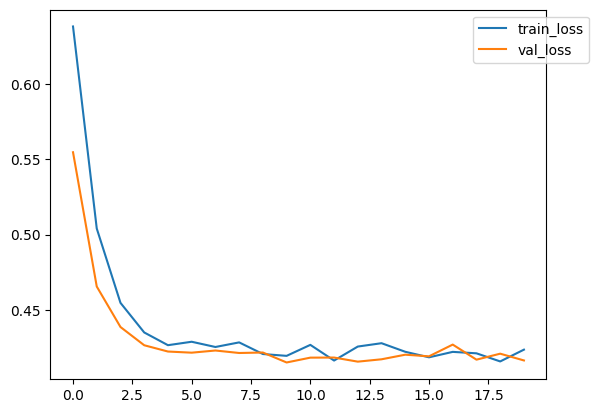

Epoch: 028, Loss: 0.4171,  Test: 0.4153Early stopping after 29 epochs with no improvement in validation loss.
Total training time 19.2410s


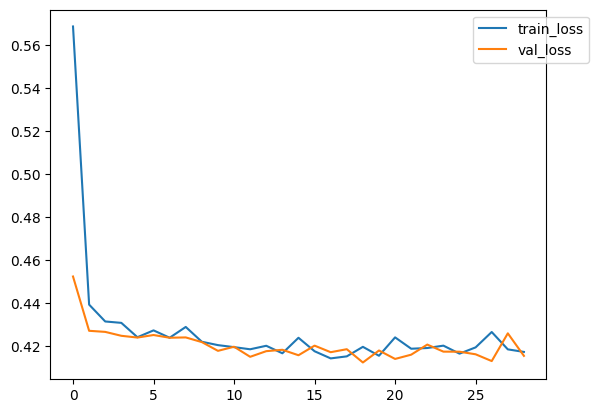

Epoch: 062, Loss: 0.4068,  Test: 0.4034Early stopping after 63 epochs with no improvement in validation loss.
Total training time 61.5400s


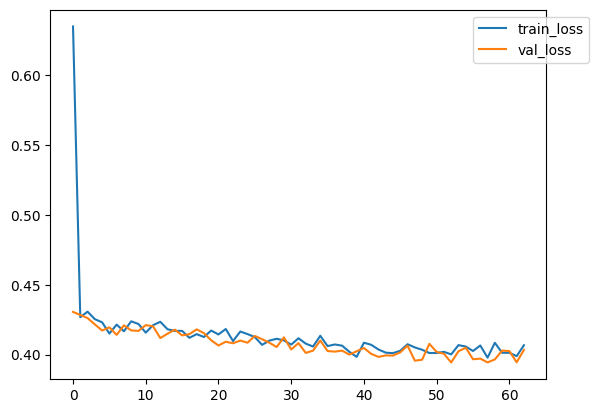

Epoch: 017, Loss: 0.4141,  Test: 0.4089Early stopping after 18 epochs with no improvement in validation loss.
Total training time 27.5355s


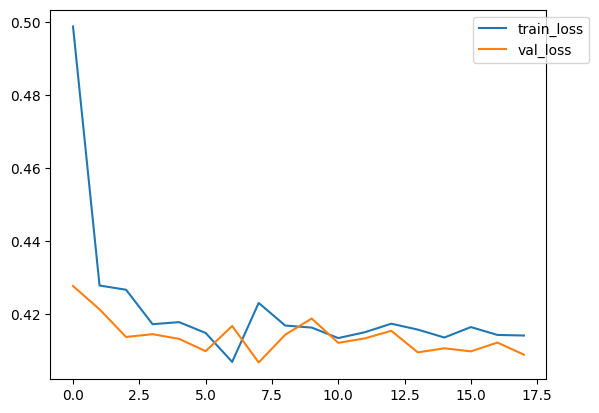

loss: [0.42200694917048753, 0.41943944968405633, 0.4036639470673042, 0.4152931074050884]
val loss: [0.4190185149346791, 0.4172604493583945, 0.3995793271481668, 0.41247925994318635]


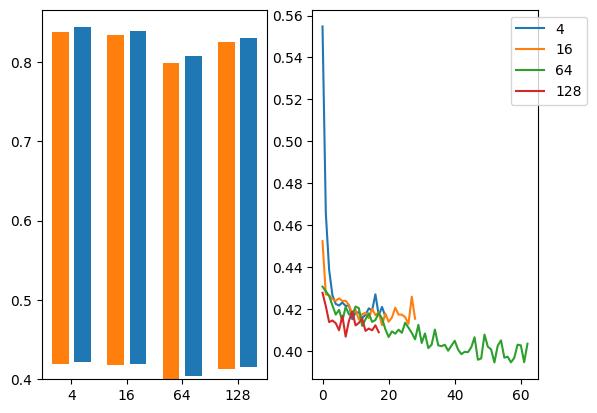

In [4]:
# Gridsearch train graphsage
if GRID_SEARCH:
    enron_folder = "data/mooc/"
    orchestrator = Orchestrator(enron_folder)
    grid_res = orchestrator.lin_grid_search_graphsage({"embedding_dim": [4, 16, 64, 128]})
    embedding_dim: 16

Epoch: 067, Loss: 0.4034,  Test: 0.3995Early stopping after 68 epochs with no improvement in validation loss.
Total training time 71.1954s


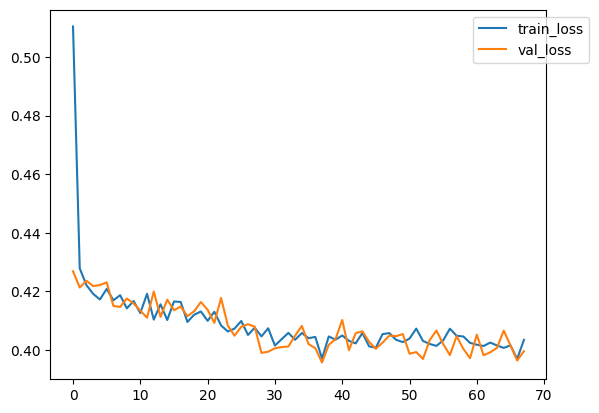

/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/pandas/io/parquet.py:189: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = self.api.Table.from_pandas(df, **from_pandas_kwargs)


In [2]:
folder = "data/mooc/"
orchestrator = Orchestrator(folder)
train_metrics = orchestrator.create_graphsage_embedding()


In [3]:
# save results
import pickle
train_config = orchestrator.config.copy()
train_config['metrcis'] = train_metrics
res_filename = 'data/mooc/exp_results/graphcase_final_run_metrics.pickle'
pickle.dump(train_config, open(res_filename, 'wb'))

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': '0'}>,
        <Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>,
        <Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>,
        <Axes: title={'center': '21'}>, <Axes: title={'center': '22'}>],
       [<Axes: title={'center': '23'}>, <Axes: title={'center': '24'}>,
        <Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>,

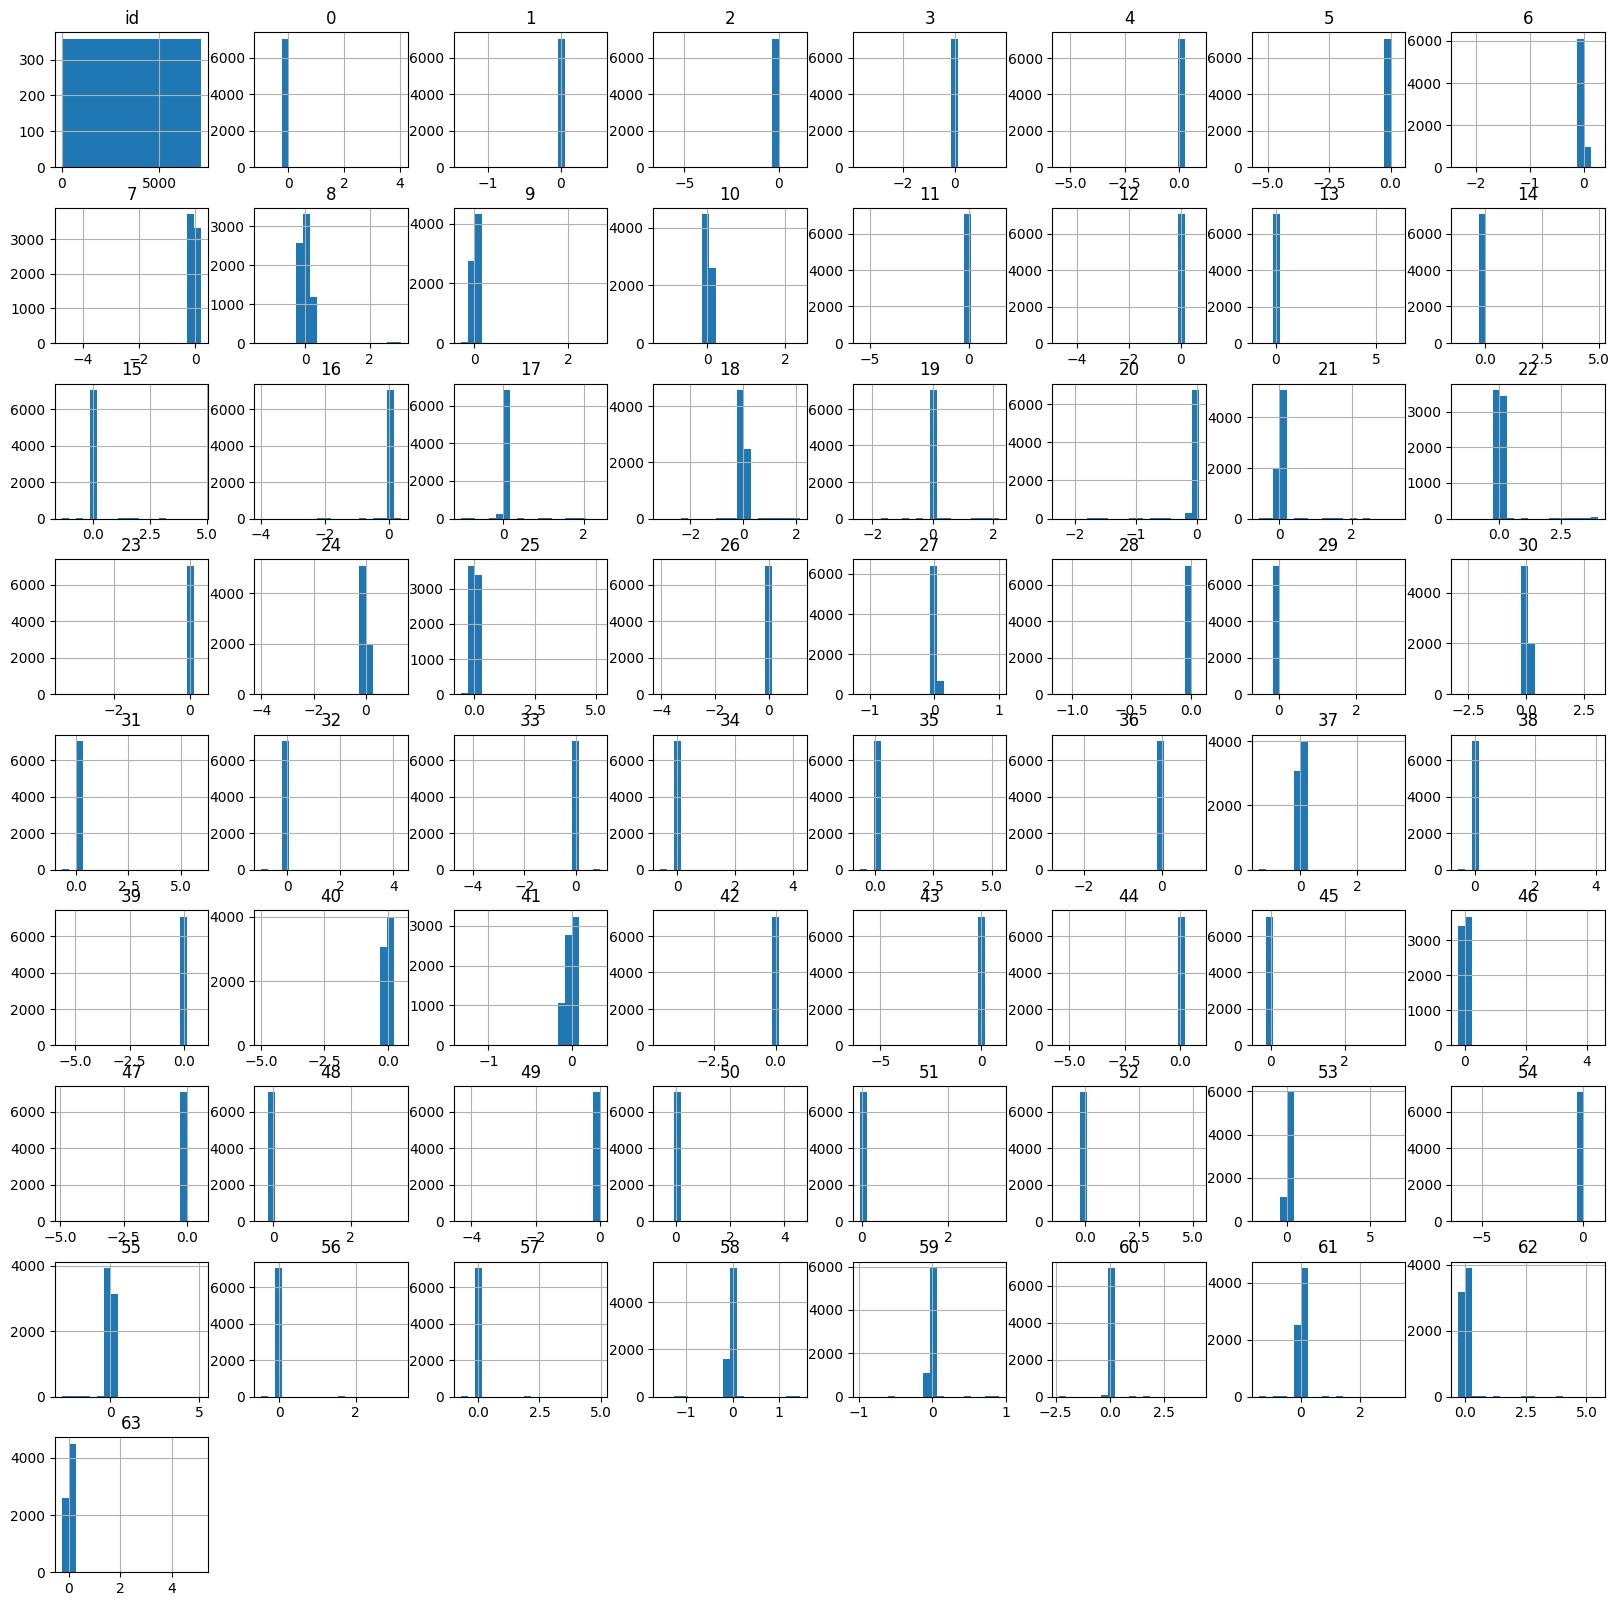

In [4]:
# convert final embedding to csv for tensorflow embedding viewer
import pandas as pd
embed = pd.read_parquet("data/mooc/embed/embedding.parquet")
embed.to_parquet("data/mooc/embed/embedding_final.parquet")
embed.to_csv("data/mooc/embed/embedding_final.csv", sep='\t', header=False, index=False, )
embed.hist(figsize=(20,20), bins=20)

## flownet training

Epoch 491/500  ['loss:-2.1792502403259277', 'val_loss:45.86927032470703']]

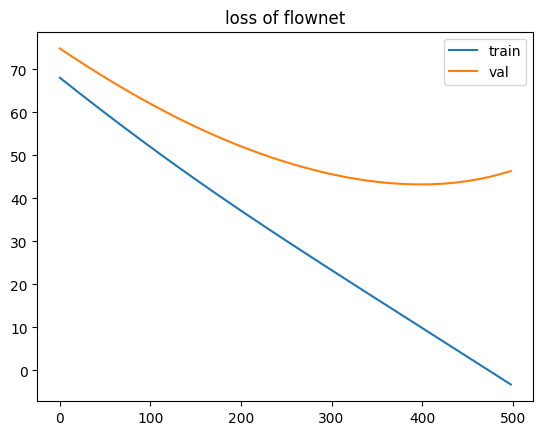

Epoch 91/500  ['loss:55.444549560546875', 'val_loss:nan']

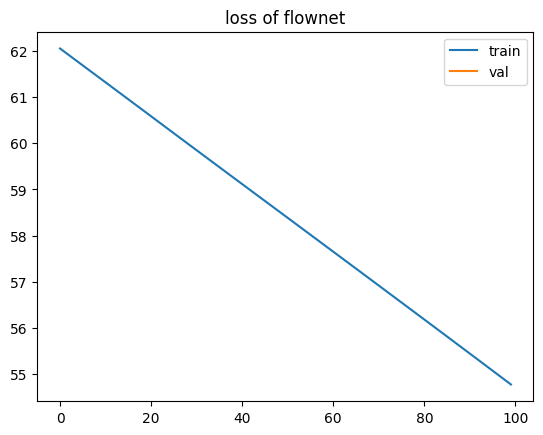

Epoch 441/500  ['loss:22.776273727416992', 'val_loss:59.211666107177734']

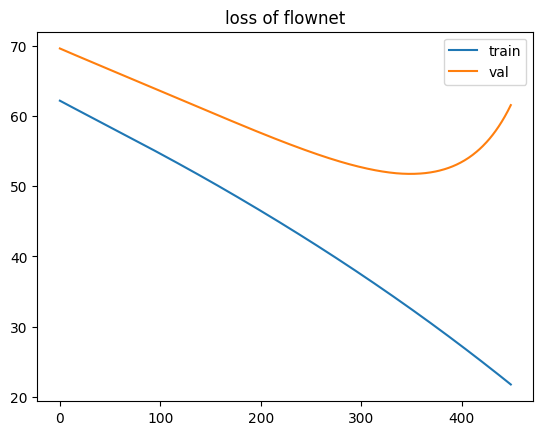

loss: [-3.0517314672470093, 54.888739585876465, 21.918480396270752]
val loss: [46.282591819763184, nan, 61.14355182647705]
Duration: 246.2461850643158


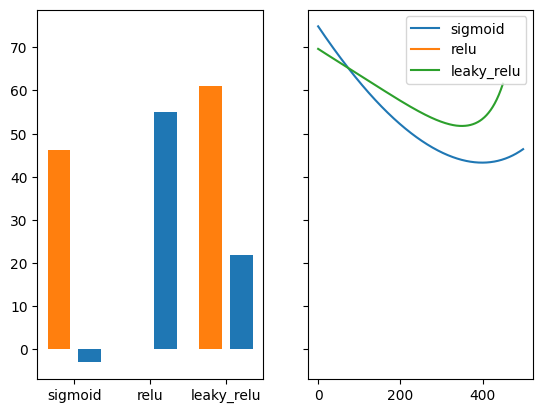

In [3]:
if GRID_SEARCH:
    folder = "data/mooc/"
    orchestrator = Orchestrator(folder)
    start = time.time()
    # res = orchestrator.lin_grid_search_flownet({"learning_rate": [0.001, 0.0001, 0.00001]})
    res = orchestrator.lin_grid_search_flownet({"activation": ['sigmoid', 'relu', 'leaky_relu']})
    end = time.time()
    print(f"Duration: {end-start}")

Epoch 281/1500  ['loss:10.01697063446045', 'val_loss:54.96957015991211']]]

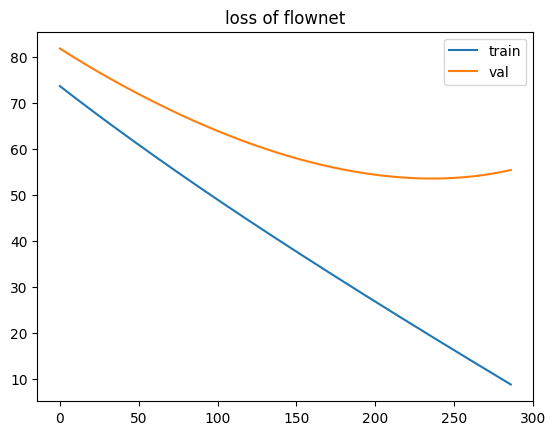

In [4]:
#final flow model
folder = "data/mooc/"
orchestrator = Orchestrator(folder)
name, history = orchestrator.train_flow()
#1m39 val_loss -4

In [5]:
# save results
import pickle
train_config = orchestrator.config.copy()
train_config['metrics'] = history.history
res_filename = 'data/mooc/exp_results/flownet_final_run_metrics.pickle'
pickle.dump(train_config, open(res_filename, 'wb'))

In [6]:
# convert final embedding to csv for tensorflow embedding viewer
import pandas as pd
filepath = orchestrator.config_path + orchestrator.config['flownet']['flownet_config_path']
obj = pickle.load(open(filepath + name, 'rb'))
pickle.dump(obj,open(filepath + "final_flowmodel.pickle", 'wb'))

## sample flownet

In [7]:
# Sample flow net
# folder = "data/mooc/"
# orchestrator = Orchestrator(folder)
# model_name = "flowmodel_final.pickle"
orchestrator.sample_flownet()

In [8]:

# convert final embedding to csv for tensorflow embedding viewer
import pandas as pd
embed = pd.read_parquet('data/mooc/synth_nodes.parquet')
embed.to_parquet('data/mooc/synth_nodes_final.parquet')
embed.to_csv("data/mooc/synth_nodes_files.csv", sep='\t', header=False, index=False, )

In [9]:
folder = "data/mooc/"
orchestrator = Orchestrator(folder)
orig_node = orchestrator._load_nodes()
orig_embed = orchestrator.load_normalized_embed()
x_data = orig_embed.join(orig_node, how='inner')


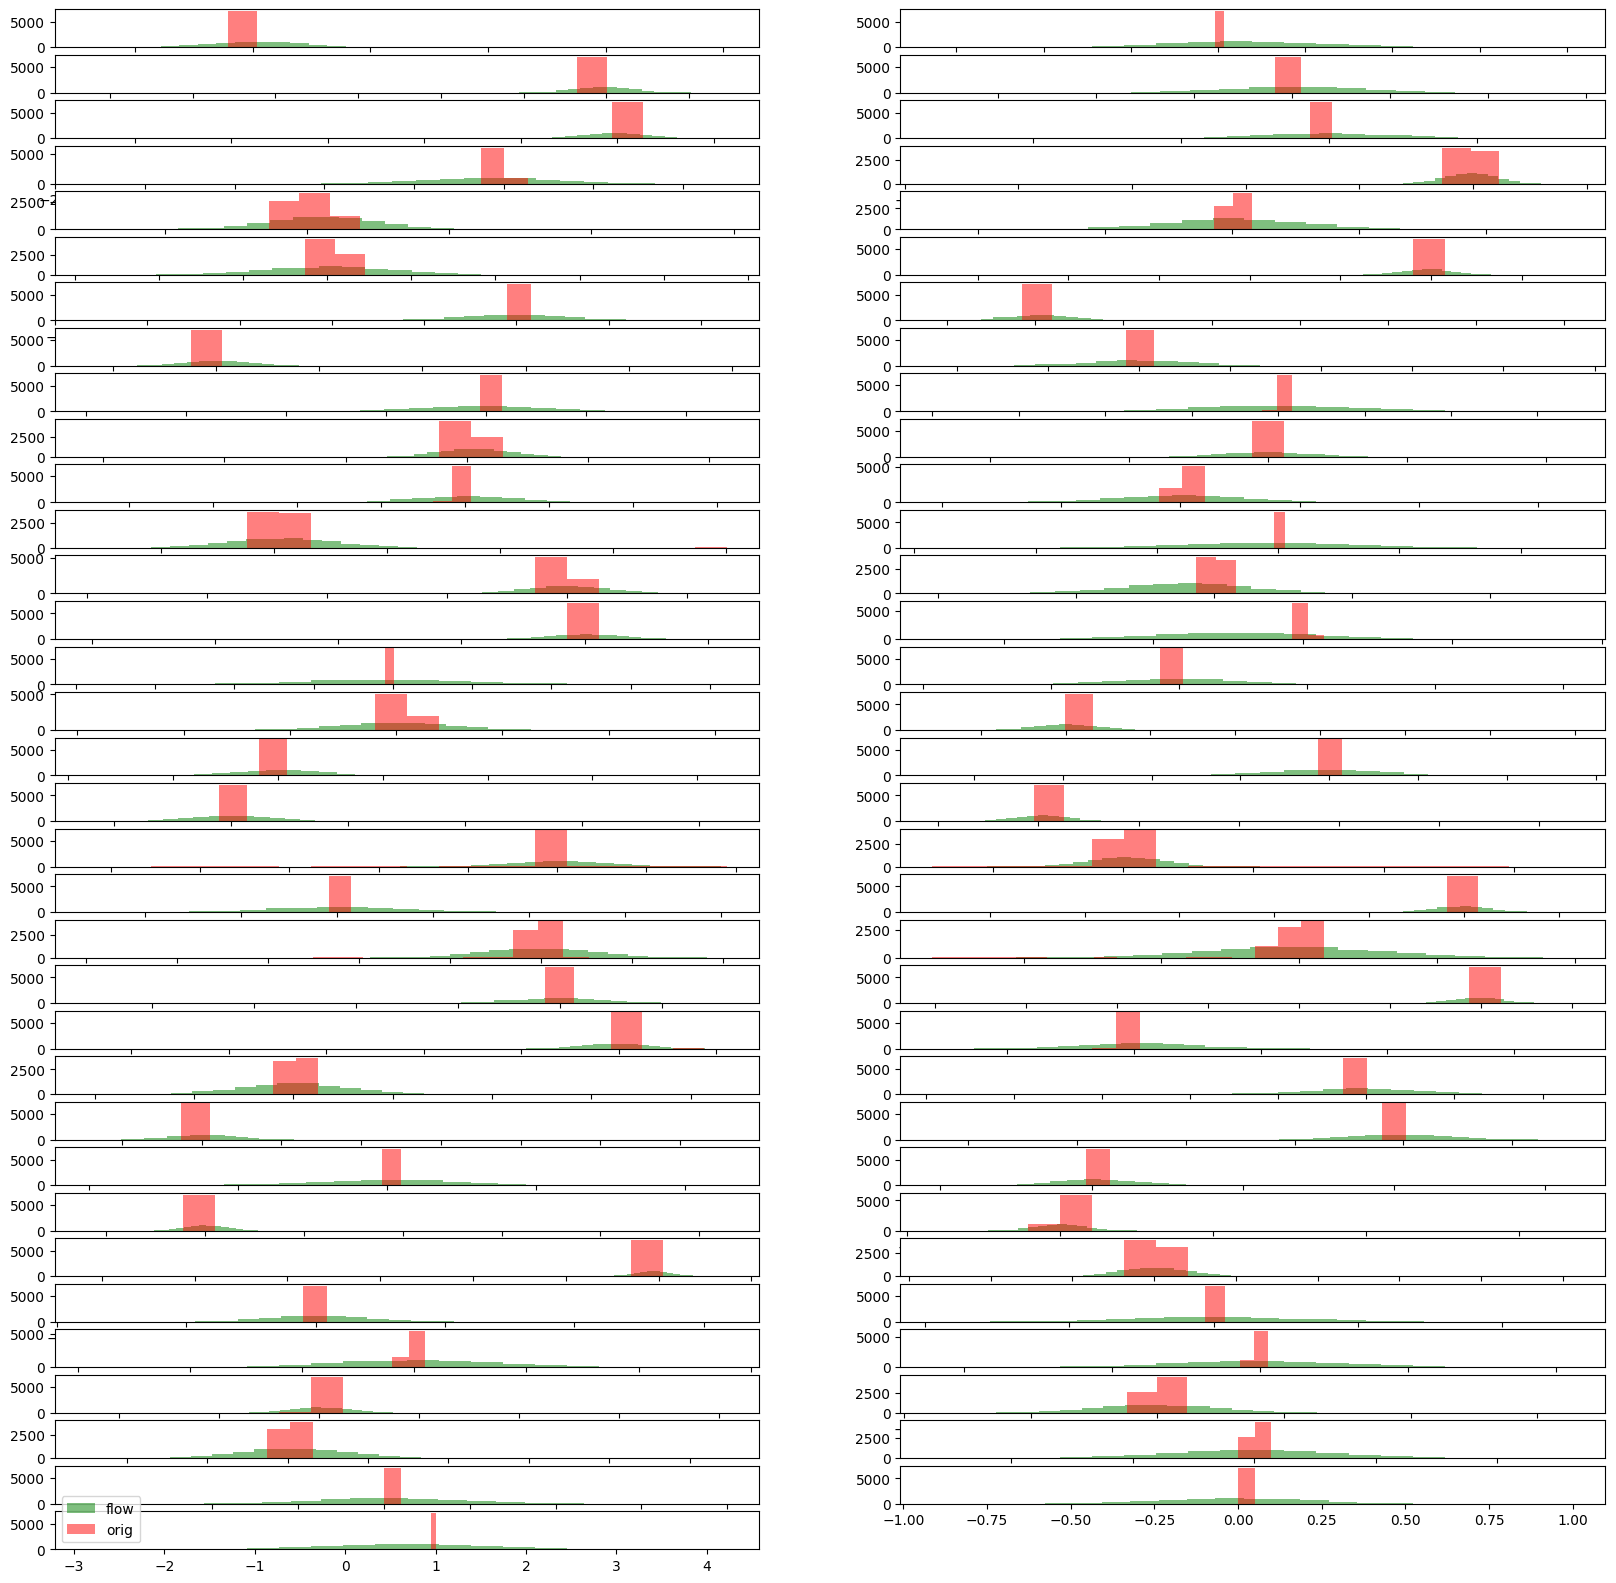

In [10]:
# plot samples embedding
import matplotlib.pyplot as plt
import math
fig = plt.figure(figsize=(20,20))
dim = embed.shape[1]
for i in range(dim):
    ax = fig.add_subplot(math.ceil(dim/2),2, i+1)
    ax.hist(embed.loc[:, i], bins=20, alpha=0.5, color='g', label='flow')
    ax.hist(x_data.iloc[:, i], bins=20, alpha=0.5, color='r', label='orig')

plt.legend()
plt.show()


## train lstm

/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  0%|          | 0/178443 [00:00<?, ?it/s]

Number of components, 14


/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

 2560 / 3000, epoch:2999 loss=0.0014793294249102473, val_loss: 0.00041790877003222704

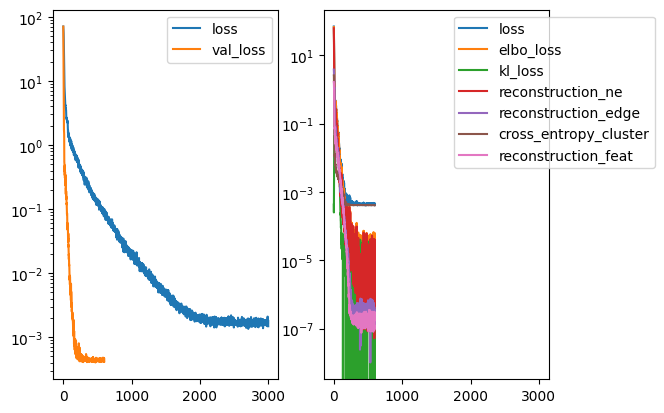

In [5]:
folder = "data/mooc/"
orchestrator = Orchestrator(folder)
# res = orchestrator.lin_grid_search_lstm({'lr': [0.001, 0.0005, 0.0001]})
loss_dict = orchestrator.train_lstm()
# loss=3.529276132583618, val_loss: 3.1
# 

In [11]:
# create synthetic walks
# loss_dict = orchestrator.train_lstm()
orchestrator.create_synthetic_walks(target_cnt=20000, map_real_time=False)

In [12]:
# convert final embedding to csv for tensorflow embedding viewer
import pickle
obj = pickle.load(open('data/mooc/synth_walks.pickle', 'rb'))
pickle.dump(obj, open('data/mooc/synth_walks_final.pickle', 'wb'))

## create synthetic graph

In [13]:
folder = "data/mooc/"
orchestrator = Orchestrator(folder)
orchestrator.generate_synth_graph()

/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  0%|          | 0/178443 [00:00<?, ?it/s]

Number of components, 14


/Users/tonpoppe/anaconda3/envs/tg_geo/lib/python3.11/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [14]:
import pandas as pd
embed = pd.read_parquet('data/mooc/synth_graph/node_attributes.parquet')
embed.to_parquet('data/mooc/synth_graph/node_attributes_final.parquet')
embed = pd.read_parquet('data/mooc/synth_graph/adjacency.parquet')
embed.to_parquet('data/mooc/synth_graph/adjacency_final.parquet')